<a href="https://colab.research.google.com/github/20Harsha/Guess_the_hidden_number/blob/master/Task_1_Prediction_using_Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Author : Harsha Kumavat**
# **GRIP @The Sparks Foundation Internship**


**Task 1 : Prediction using Supervised Machine Learning.**

Predict the percentage of an student based on the no. of study hours.This is Simple Linear Regression task as it involve only 2 variables.

**Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

**Reading data from the source**

In [ ]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
#pd.read_csv() is used to read the data from the csv file
df = pd.read_csv(url)   #Reading data from remote link
print("Data imported successfully")

Data imported successfully


In [ ]:
df.head() #To view the first 5 rows of the dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Exploratory Data Analysis**

In [ ]:
df.shape

(25, 2)

In [ ]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
df.isnull().sum() #checking whether any null values are present or not

Hours     0
Scores    0
dtype: int64

In [ ]:
#info() is used to give basic information about the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#Describe() is used to get the statistical summary of te data.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
fig = px.box(df, y="Scores",height=500,width=1000)
fig.update_layout(title_text='Student\'s Percentage score', title_x=0.5)
fig.show()

In [ ]:
fig = px.box(df, y="Hours",height=500,width=1000)
fig.update_layout(title_text='Duration of study', title_x=0.5)
fig.show()

**Finding correlation between Hours & Scores**

In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Scatter plot to find the relationship between Hours studied vs Student Percentage score**

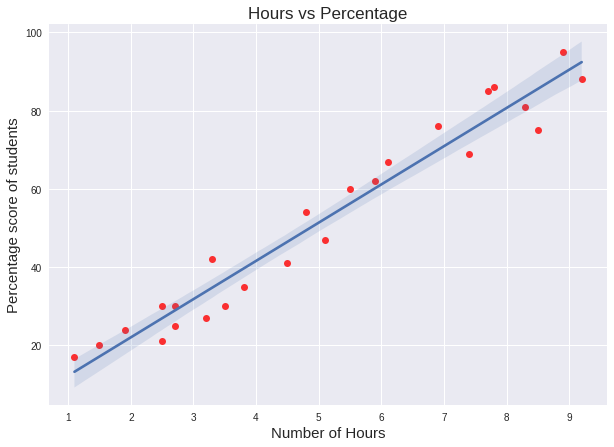

In [ ]:
plt.figure(figsize=(10,7))
sns.regplot(df['Hours'],df['Scores'],scatter_kws = {'color': 'r'})
plt.title('Hours vs Percentage',size=17)
plt.xlabel('Number of Hours',size=15)
plt.ylabel('Percentage score of students',size=15)
plt.style.use('seaborn')
plt.show()

**Prepare the data**

In [ ]:
#Divide the data into "attributes" (inputs) and "labels" (outputs)
x = df[['Hours']]
y = df['Scores'] 

In [ ]:
#Dividing the dataset into training and testing part.
#To do this we use Scikit-Learn's built-in train_test_split() method
#For training 80% of data is given the model and 20% for testing the model

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

**Model Training**

In [ ]:
#Using Linear Regression to predict students score
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
#Training the model
lm.fit(x_train,y_train)
print('Training Complete')

Training Complete


**Formula of Linear Regression is y= a0 + a1*x+ e
  where**


*   y = Dependent variable or target variable
*   x = Independent variable or predictor
*   a1 = slope of the line
*   a0 = y-intercept of the line
*   e = random error

Refer : https://www.javatpoint.com/linear-regression-in-machine-learning



In [ ]:
a1 = lm.coef_
a0 = lm.intercept_
print(f'Slope of the line : {a1}')
print(f'y-intercept of the line : {a0}')

Slope of the line : [9.91065648]
y-intercept of the line : 2.018160041434662


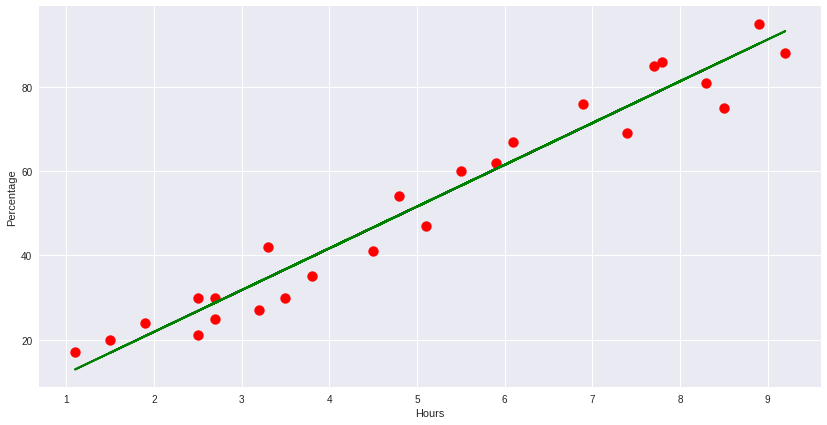

In [ ]:
# Plotting the regression line
y_ = a1*x + a0

plt.figure(figsize=(14,7))
plt.scatter(x,y,color='red',s=100)
plt.plot(x ,y_,ls='-',color='green',lw=2)
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

In [ ]:
#After training the model now lets predict the test percentage 
#For testing the model we use x_test(Hours studied) and to predict y_test(Percentage score)
y_pred = lm.predict(x_test)

In [ ]:
#Comparing the Actual values and predicted values
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


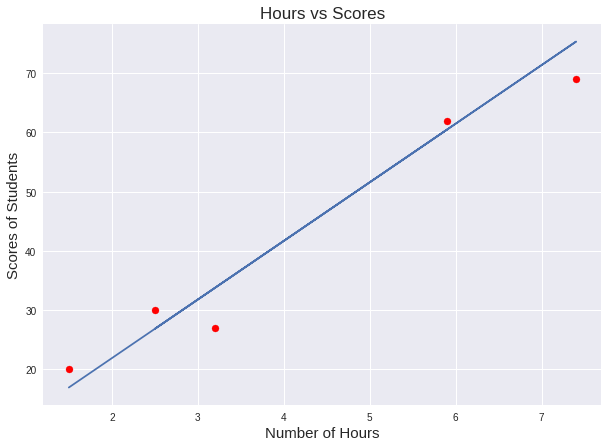

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x_test,y_test,color='r')
plt.plot(x_test,y_pred)
plt.title('Hours vs Scores',size=17)
plt.xlabel('Number of Hours',size=15)
plt.ylabel('Scores of Students',size=15)
plt.style.use('seaborn')
plt.show()

**What will be predicted score if a student studies for 9.5 hrs/day?**

In [ ]:
Percentage_Score = lm.predict(np.array([[9.5]]))
print('Number of Hours studied : 9.5 hrs/day')
print(f'Percentage Score : {Percentage_Score}')

Number of Hours studied : 9.5 hrs/day
Percentage Score : [96.16939661]


**Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Absoluter Error(MAE) : {MAE}')
print(f'Mean Squared Error(MSE) : {MSE}')
print(f'Root Mean Squared Error: {RMSE}')

Mean Absoluter Error(MAE) : 4.183859899002982
Mean Squared Error(MSE) : 21.598769307217456
Root Mean Squared Error: 4.647447612100373


In [ ]:
print('Estimated Training and Testing score')
print(f'Training score : {lm.score(x_train,y_train)}')
print(f'Testing score : {lm.score(x_test,y_test)}')

Estimated Training and Testing score
Training score : 0.9515510725211552
Testing score : 0.9454906892105354


In [58]:
print(f'R-Squared Score : {r2_score(y_test,y_pred)}')

R-Squared Score : 0.9454906892105354


#**Summary**#

*   The dataset consist of students study hours and their percentage score
*   There are 25 rows and 2 columns.
*   Student's Percentage score range from 17 - 95, where 17 is the minimum score,95 being the maximum score and median score is 47.
*   Student's study hours range from 1.1 hrs - 9.2 hrs where 1.1hrs is the minimum, 9.2 is the maximum and median number of hours students studied is 4.8.
*   Correlation between Hours vs Scores is 0.9761. Hence their is a positive strong linear relationship between Hours studied vs Students percentage score.
*   **Problem Statement :**  Predict score of a student when student studies for 9.5 hrs/day. 

   Using simple linear regression to predict student's percentage score. Linear regression model has predicted the percentage score as 96.169 when student studies for 9.5 hrs/day.
*  The Simple Linear Regression model performs well as the R-Squared value is 0.945. 





